In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [24]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

x1=np.asarray(np.random.uniform(0,1,100000))
x2=np.asarray(np.random.uniform(0,1,100000))
x1=2*x1-1
x2=2*x2-1


X = []
Y = []

for j in range(0,1000):
    if(x2[j]**2+x1[j]**2 <= 1):
        Y.append( [1])
    else:
        Y.append( [0])
    X.append([x1[j],x2[j]])

X=np.asarray(X)
Y=np.asarray(Y)


Declaracion de Variables

In [25]:
input_size = 2
output_layer_size = 1
middle_size = 2

#input and output
x = tf.placeholder(tf.float32,[None, input_size])
#y es la prediccion de y_
#y_ son los datos de y
y_ = tf.placeholder(tf.float32,[None, output_layer_size])

##cambios
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1") #puede ser error


W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3")

In [26]:
tf.Print(W_layer1)

TypeError: Print() takes at least 2 arguments (1 given)

In [27]:
hidden1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
#hidden1 = tf.nn.sigmoid(tf.matmul(input1,W_layer2)+b_layer2) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(hidden1,W_layer3)+b_layer3) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)



In [28]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [29]:
sess.run(init) 

Ws = []

for i in range (100000):
    sess.run(train_step, feed_dict = {x: X, y_: Y})
    if(i%1000==0):
        w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
        w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
        w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]
        Ws.append([w1,w2,w3])
    



In [30]:
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer2, feed_dict={x: X, y_: Y}))

[[ 0.87511104]]
[[-0.17680955  0.99166179]
 [-0.82508492  0.46361041]]


In [31]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.831


In [32]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]

In [33]:
print w1
print w2
print w3



[3.4627609, -0.40244901, 3.6423948]
[0.0, -0.17680955, -0.82508492]
[-12.49815, 8.7672186, 7.1223965]


In [34]:
sess.close()

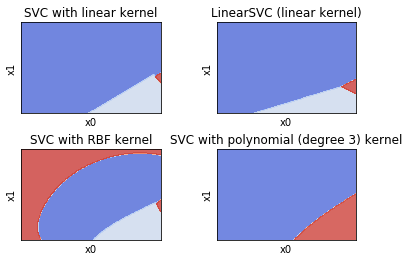

In [36]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

xx, yy = make_meshgrid(X[0], X[1])

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()